## Dependencies

In [2]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time
import albumentations as A
from albumentations.augmentations import transforms as T

## Capture images

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #folder to save images
labels = ['Rock', 'Paper','Scissor'] #labels for images
number_imgs = 20 #number of images per label

In [ ]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW) #start webcam

In [ ]:
#capturing images via webcam in intervalls per label
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
cap.release()
cv2.destroyAllWindows()

## Augment images via Albumentations

In [71]:
import os
import cv2
import numpy as np
from albumentations import (
    Compose, HorizontalFlip, RandomBrightnessContrast, HueSaturationValue,
    ImageCompression, RandomGamma, Rotate, BboxParams, VerticalFlip
)


image_folder = "data/images"
label_folder = "data/labels"


augmentations = Compose([
    HorizontalFlip(p=0.5),  
    RandomBrightnessContrast(p=0.5),  
    HueSaturationValue(p=0.5),  
    ImageCompression(quality_lower=85, quality_upper=95, p=0.2),  
    RandomGamma(p=0.5), 
    Rotate(limit=10, p=0.5),  
    VerticalFlip(p=0.5)
], bbox_params=BboxParams(format='yolo', label_fields=['category_id']))


image_files = os.listdir(image_folder)
label_files = os.listdir(label_folder)


for i in range(1,10): #set amount of augmented images to 10 per original image
    #get files
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        label_file = image_file.replace(".jpg", ".txt")
        label_path = os.path.join(label_folder, label_file)

       
        image = cv2.imread(image_path) #read image
        labels = np.loadtxt(label_path).reshape(-1, 5) #read label
       
        augmented = augmentations(image=image, bboxes=labels[:, 1:], category_id=labels[:, 0]) #augment images and labels

       
        augmented_image = augmented["image"] #store image
        augmented_labels = np.column_stack((augmented["category_id"], augmented["bboxes"])) #store label

        cv2.imwrite(f"data/augmented_images/{i}{image_file}", augmented_image) #save image
        np.savetxt(f"data/augmented_labels/{i}{label_file}", augmented_labels, fmt=["%d", "%.6f", "%.6f", "%.6f", "%.6f"]) #save label


### (The augmented images were moved manually to the training data folder)

## Visualize images and labels

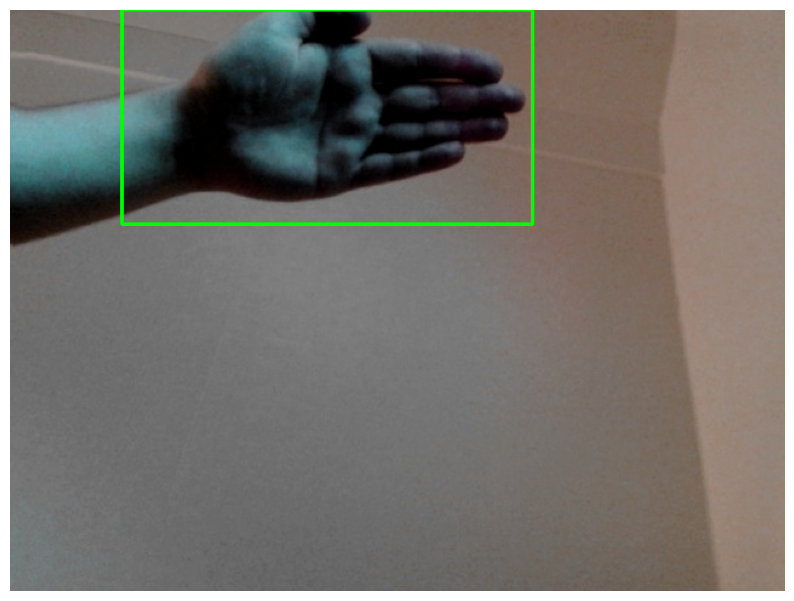

: 

In [102]:
import os
import cv2
import matplotlib.pyplot as plt
import random 
num=random.randint(1,500)
# get random image from folder
augmented_images_folder = "data/images"
augmented_labels_folder = "data/labels"
augmented_image_files = os.listdir(augmented_images_folder)
random_augmented_image_file = augmented_image_files[num] 

#load image
augmented_image_path = os.path.join(augmented_images_folder, random_augmented_image_file)
augmented_image = cv2.imread(augmented_image_path)
augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB)

#load label
label_file = random_augmented_image_file.replace(".jpg", ".txt")
label_path = os.path.join(augmented_labels_folder, label_file)
augmented_labels = np.loadtxt(label_path).reshape(-1, 5)

#render label 
for label in augmented_labels:
    category_id = int(label[0])
    x, y, w, h = label[1:]
    xmin = int((x - w / 2) * augmented_image.shape[1])
    ymin = int((y - h / 2) * augmented_image.shape[0])
    xmax = int((x + w / 2) * augmented_image.shape[1])
    ymax = int((y + h / 2) * augmented_image.shape[0])
    cv2.rectangle(augmented_image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(augmented_image, str(category_id), (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

#render image & label
plt.figure(figsize=(10, 8))
plt.imshow(augmented_image)
plt.axis('off')
plt.show()
